# Analyse des ventes de la librairie LAPAGE

# Travail préalable à l'analyse :

Avant toute chose, nous devons procéder à la vérification des tables fournies par l'entreprise et s'assurer de leur bonne cohérence.
Le cas échéant, nous devrons effectuer d'éventuelles modifications de valeurs nulles, d'informations erronnées...

# Importation, vérification, puis nettoyage des tables ...

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform
from scipy.stats import randint
from scipy import stats
import seaborn as sns
import math
from datetime import datetime
import statistics
from collections import Counter
from scipy.stats import shapiro

TABLE CLIENTS - "customers.csv"

In [2]:
#Vérification de la table customers

clients = pd.read_csv ('customers.csv', sep=',')
clients.info()
clients.isna().sum()
print(clients.shape)
clients.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB
(8623, 3)


,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [3]:
#Vérification des doublons dans la colonne id

print("Il y a", clients.duplicated(['client_id']).sum(), "doublon(s) au niveau des id clients.")

Il y a 0 doublon(s) au niveau des id clients.


In [4]:
#Vérification de la confmité de la colonne sex

if ((len(np.unique(clients['sex']))) == 2 ) :
    print ("Il y a bien", (len(np.unique(clients['sex']))), "catégories dans la colonne sex.")
else :
    print ("Il y a", (len(np.unique(clients['sex']))),"catégories dans la colonne sex.")

Il y a bien 2 catégories dans la colonne sex.


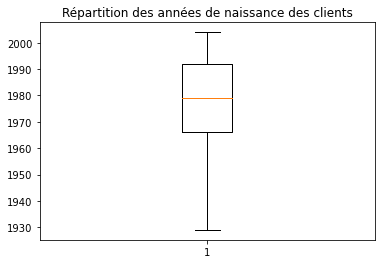

L'ensemble du fichier clients semble cohérent. Passons à la suite !


In [5]:
#Vérification de la cohérence des âges à l'aide d'un boxplot

plt.boxplot(clients['birth'])
plt.title("Répartition des années de naissance des clients")
plt.show()

print("L'ensemble du fichier clients semble cohérent. Passons à la suite !")

In [6]:
#Vérification de la table produits

produits = pd.read_csv ('products.csv', sep=',')
print(produits.shape)
print("")
produits.info()
produits.isna().sum()

(3287, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


id_prod    0
price      0
categ      0
dtype: int64

In [7]:
#Vérification d'un extrait de la table

print(produits.head())

  id_prod  price  categ
0  0_1421  19.99      0
1  0_1368   5.13      0
2   0_731  17.99      0
3   1_587   4.99      1
4  0_1507   3.99      0


In [8]:
#Vérification du nombre de catégories

print("Il y a",(len(np.unique(produits['categ']))), "catégorie(s) dans la colonne categ.")
print("")

#Vérification des doublons

print("Il y a", produits.duplicated(['id_prod']).sum(), "doublon(s) pour la variable id_prod.")

Il y a 3 catégorie(s) dans la colonne categ.

Il y a 0 doublon(s) pour la variable id_prod.


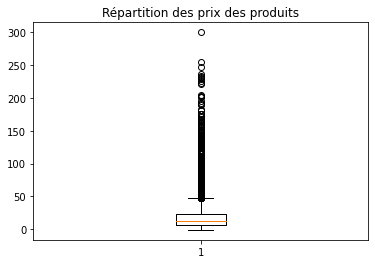

In [9]:
#Vérification de la cohérence des prix des produits à l'aide d'un boxplot

plt.boxplot(produits['price'])
plt.title("Répartition des prix des produits")
plt.show()

Jusqu'à maintenant, la table PRODUITS semble cohérente et sans valeurs aberrantes ...

In [10]:
#Vérification des valeurs minimales de 'price'

#Hypothèse d'une valeur négative
if any(produits["price"]) >= 0 :
    print ("La variable price contient des valeurs négatives ou égales à zéro.")
    print(produits.sort_values(["price"], ascending=True).head(3)),    
else :
    print("La variable price semble cohérente.")

La variable price contient des valeurs négatives ou égales à zéro.
     id_prod  price  categ
731      T_0  -1.00      0
2355   0_202   0.62      0
2272   0_528   0.62      0


La valeur négative "-1.00" est une valeur négative et doit être supprimée afin de faire une analyse correcte. 
Approfondissons les vérifications afin de cerner le problème et de le corriger comme il se doit.

In [11]:
#Vérification des valeurs maximales de 'price'

produits.sort_values(["price"], ascending=False).head(5)

,id_prod,price,categ
947,2_2,300.00,2
724,2_76,254.44,2
394,2_158,247.22,2
1436,2_167,236.99,2
2779,2_30,233.54,2


In [12]:
#Vérification de la table transactions

transactions = pd.read_csv ('transactions.csv', sep=',')
print(transactions.shape)
print("")
transactions.info()
transactions.isna().sum()

#Visualisation d'un extrait de la table transactions

print(transactions.head())
print("")
print("On s'aperçoit que le format date n'est pas adapté, en plus d'être de type objet...")

(679532, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB
  id_prod                        date session_id client_id
0  0_1518  2022-05-20 13:21:29.043970   s_211425     c_103
1   1_251  2022-02-02 07:55:19.149409   s_158752    c_8534
2  0_1277  2022-06-18 15:44:33.155329   s_225667    c_6714
3   2_209  2021-06-24 04:19:29.835891    s_52962    c_6941
4  0_1509  2023-01-11 08:22:08.194479   s_325227    c_4232

On s'aperçoit que le format date n'est pas adapté, en plus d'être de type objet...


In [13]:
#Visualisation de la cohérence de la table transactions

print("Quelques chiffres clés :")
print("")
print((len(np.unique(transactions['id_prod']))), "produit(s) différent(s) vendu(s)",) 
print((len(np.unique(transactions['client_id']))), "client(s) différent(s)",)
print((len(np.unique(transactions['session_id']))), "sessions d'achats uniques.")


print(transactions.duplicated(['session_id']).sum(),"doublons de sessions d'achat, donc de paniers d'achats de deux articles ou plus.")

Quelques chiffres clés :

3267 produit(s) différent(s) vendu(s)
8602 client(s) différent(s)
342316 sessions d'achats uniques.
337216 doublons de sessions d'achat, donc de paniers d'achats de deux articles ou plus.


In [14]:
#Vérification de la cohérence des dates (1)

debut = transactions['date'].sort_values(ascending=True).head(1)
print("Le début du fichier commence à partir de la transaction",debut,"." )

Le début du fichier commence à partir de la transaction 480642    2021-03-01 00:01:07.843138
Name: date, dtype: object .


In [15]:
#Vérification de la cohérence des dates (2)

print(transactions.sort_values(["date"], ascending=False).head())
print("")
print("Nous verrons après l'étape des jointures, et la suppression des", len(transactions[(transactions['id_prod'] == "T_0")].index), "valeurs parasites avec pour id_prod T_0, à quelle date la dernière transaction est enregistrée.")

       id_prod                             date session_id client_id
246980     T_0  test_2021-03-01 02:30:02.237450        s_0      ct_0
573155     T_0  test_2021-03-01 02:30:02.237449        s_0      ct_0
670680     T_0  test_2021-03-01 02:30:02.237449        s_0      ct_1
19312      T_0  test_2021-03-01 02:30:02.237449        s_0      ct_0
392443     T_0  test_2021-03-01 02:30:02.237448        s_0      ct_0

Nous verrons après l'étape des jointures, et la suppression des 200 valeurs parasites avec pour id_prod T_0, à quelle date la dernière transaction est enregistrée.


Nous avons vu qu'il y a une valeur aberrante négative, dans la table PRODUITS, ainsi qu'un ensemble de session de "test" qui n'ont pas leur place dans notre analyse de sventes de la librairie.

Certaines de ces valeurs, étant sûrement liées les unes aux autres, il sera plus facile de les supprimer totalement une fois ces différentes tables jointes ensemble.

# Jointures des tables

In [16]:
#Jointure de la table clients à la table transactions et vérification de la bonne jointure

cli_tran = pd.merge(transactions,clients, how = "inner")
cli_tran.head()
cli_tran.info

<bound method DataFrame.info of        id_prod                        date session_id client_id sex  birth
0       0_1518  2022-05-20 13:21:29.043970   s_211425     c_103   f   1986
1       0_1627  2022-06-18 05:55:31.816994   s_225494     c_103   f   1986
2       0_1104  2023-02-08 17:31:06.898425   s_338755     c_103   f   1986
3       0_1390  2021-04-20 06:18:39.939761    s_23078     c_103   f   1986
4       0_1547  2022-03-15 19:54:53.904123   s_179629     c_103   f   1986
...        ...                         ...        ...       ...  ..    ...
679527  0_1509  2021-05-15 08:17:35.835342    s_34762    c_8114   m   1962
679528   1_152  2021-11-08 17:12:27.637349   s_116675     c_240   m   1998
679529   2_207  2021-06-01 04:31:16.088314    s_42418     c_305   f   1996
679530   1_521  2022-10-18 00:38:49.629165   s_284060     c_305   f   1996
679531   1_521  2021-12-18 00:38:49.629165   s_135996     c_305   f   1996

[679532 rows x 6 columns]>

In [17]:
#Jointure de la table finale et vérification de sa cohérence

lapage_final = pd.merge(cli_tran, produits, how = "left")
lapage_final.head()
lapage_final.info

<bound method DataFrame.info of        id_prod                        date session_id client_id sex  birth  \
0       0_1518  2022-05-20 13:21:29.043970   s_211425     c_103   f   1986   
1       0_1627  2022-06-18 05:55:31.816994   s_225494     c_103   f   1986   
2       0_1104  2023-02-08 17:31:06.898425   s_338755     c_103   f   1986   
3       0_1390  2021-04-20 06:18:39.939761    s_23078     c_103   f   1986   
4       0_1547  2022-03-15 19:54:53.904123   s_179629     c_103   f   1986   
...        ...                         ...        ...       ...  ..    ...   
679527  0_1509  2021-05-15 08:17:35.835342    s_34762    c_8114   m   1962   
679528   1_152  2021-11-08 17:12:27.637349   s_116675     c_240   m   1998   
679529   2_207  2021-06-01 04:31:16.088314    s_42418     c_305   f   1996   
679530   1_521  2022-10-18 00:38:49.629165   s_284060     c_305   f   1996   
679531   1_521  2021-12-18 00:38:49.629165   s_135996     c_305   f   1996   

        price  categ  
0       

#  Vérification et nettoyage des données aberrantes

In [18]:
#Vérification des valeurs test de la table finale

print(lapage_final.sort_values(["date"], ascending=False).head(3))
print(lapage_final.sort_values(["date"], ascending=True).head(3))

#Export csv intermédiaire de la table
gfg_csv_data = lapage_final.to_csv('lapage_final.csv', index = True)

       id_prod                             date session_id client_id sex  \
309473     T_0  test_2021-03-01 02:30:02.237450        s_0      ct_0   f   
309530     T_0  test_2021-03-01 02:30:02.237449        s_0      ct_0   f   
309443     T_0  test_2021-03-01 02:30:02.237449        s_0      ct_0   f   

        birth  price  categ  
309473   2001   -1.0    0.0  
309530   2001   -1.0    0.0  
309443   2001   -1.0    0.0  
       id_prod                        date session_id client_id sex  birth  \
467625  0_1259  2021-03-01 00:01:07.843138        s_1     c_329   f   1967   
244742  0_1390  2021-03-01 00:02:26.047414        s_2     c_664   m   1960   
124034  0_1352  2021-03-01 00:02:38.311413        s_3     c_580   m   1988   

        price  categ  
467625  11.99    0.0  
244742  19.37    0.0  
124034   4.50    0.0  


# Nettoyage de la table finale

In [19]:
# Création de l'index du dataset final

lapage_final.set_index('date')
print(lapage_final.columns)
print(lapage_final.info)

Index(['id_prod', 'date', 'session_id', 'client_id', 'sex', 'birth', 'price',
       'categ'],
      dtype='object')
<bound method DataFrame.info of        id_prod                        date session_id client_id sex  birth  \
0       0_1518  2022-05-20 13:21:29.043970   s_211425     c_103   f   1986   
1       0_1627  2022-06-18 05:55:31.816994   s_225494     c_103   f   1986   
2       0_1104  2023-02-08 17:31:06.898425   s_338755     c_103   f   1986   
3       0_1390  2021-04-20 06:18:39.939761    s_23078     c_103   f   1986   
4       0_1547  2022-03-15 19:54:53.904123   s_179629     c_103   f   1986   
...        ...                         ...        ...       ...  ..    ...   
679527  0_1509  2021-05-15 08:17:35.835342    s_34762    c_8114   m   1962   
679528   1_152  2021-11-08 17:12:27.637349   s_116675     c_240   m   1998   
679529   2_207  2021-06-01 04:31:16.088314    s_42418     c_305   f   1996   
679530   1_521  2022-10-18 00:38:49.629165   s_284060     c_305   f   1

In [20]:
# Suppression des valeurs test du dataset via l'id_prod "tests"

indexNames = lapage_final[(lapage_final['id_prod'] == 'T_0')].index
lapage_final.drop(indexNames , inplace=True)
print(lapage_final.head(3))
print(len(lapage_final))

  id_prod                        date session_id client_id sex  birth  price  \
0  0_1518  2022-05-20 13:21:29.043970   s_211425     c_103   f   1986   4.18   
1  0_1627  2022-06-18 05:55:31.816994   s_225494     c_103   f   1986   3.99   
2  0_1104  2023-02-08 17:31:06.898425   s_338755     c_103   f   1986  13.21   

   categ  
0    0.0  
1    0.0  
2    0.0  
679332


In [21]:
# Conversion de la colonne 'date' en format dates

lapage_final['date'] = pd.to_datetime(lapage_final['date'], format="%Y-%m-%d %H:%M:%S.%f")
lapage_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   sex         679332 non-null  object        
 5   birth       679332 non-null  int64         
 6   price       679111 non-null  float64       
 7   categ       679111 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 46.6+ MB


In [22]:
#Export csv de la table finale nettoyée
gfg_csv_data = lapage_final.to_csv('lapage_final.csv', index = True)

In [23]:
# Import de la sauvegarde intermédiaire

lapage_final = pd.read_csv ('lapage_final.csv', sep=',')
lapage_final.head()
lapage_final.info

<bound method DataFrame.info of         Unnamed: 0 id_prod                        date session_id client_id  \
0                0  0_1518  2022-05-20 13:21:29.043970   s_211425     c_103   
1                1  0_1627  2022-06-18 05:55:31.816994   s_225494     c_103   
2                2  0_1104  2023-02-08 17:31:06.898425   s_338755     c_103   
3                3  0_1390  2021-04-20 06:18:39.939761    s_23078     c_103   
4                4  0_1547  2022-03-15 19:54:53.904123   s_179629     c_103   
...            ...     ...                         ...        ...       ...   
679327      679527  0_1509  2021-05-15 08:17:35.835342    s_34762    c_8114   
679328      679528   1_152  2021-11-08 17:12:27.637349   s_116675     c_240   
679329      679529   2_207  2021-06-01 04:31:16.088314    s_42418     c_305   
679330      679530   1_521  2022-10-18 00:38:49.629165   s_284060     c_305   
679331      679531   1_521  2021-12-18 00:38:49.629165   s_135996     c_305   

       sex  birth  

In [24]:
# Vérification suite à la suppression des valeurs tests

print(lapage_final.info)

<bound method DataFrame.info of         Unnamed: 0 id_prod                        date session_id client_id  \
0                0  0_1518  2022-05-20 13:21:29.043970   s_211425     c_103   
1                1  0_1627  2022-06-18 05:55:31.816994   s_225494     c_103   
2                2  0_1104  2023-02-08 17:31:06.898425   s_338755     c_103   
3                3  0_1390  2021-04-20 06:18:39.939761    s_23078     c_103   
4                4  0_1547  2022-03-15 19:54:53.904123   s_179629     c_103   
...            ...     ...                         ...        ...       ...   
679327      679527  0_1509  2021-05-15 08:17:35.835342    s_34762    c_8114   
679328      679528   1_152  2021-11-08 17:12:27.637349   s_116675     c_240   
679329      679529   2_207  2021-06-01 04:31:16.088314    s_42418     c_305   
679330      679530   1_521  2022-10-18 00:38:49.629165   s_284060     c_305   
679331      679531   1_521  2021-12-18 00:38:49.629165   s_135996     c_305   

       sex  birth  

In [25]:
# Suite des vérifications après nettoyage

print(lapage_final.sort_values(["date"], ascending=False).head(3))
print(lapage_final.sort_values(["date"], ascending=True).head(3))
print("")
fin = lapage_final['date'].sort_values(ascending=False).head(1)
print("Le fichier débute donc à la transaction", debut, " et se termine donc à la transaction", fin ,"." )


        Unnamed: 0 id_prod                        date session_id client_id  \
89425        89425  0_1398  2023-02-28 23:58:30.792755   s_348435    c_3575   
470492      470598  0_1547  2023-02-28 23:58:00.107815   s_348447    c_4848   
196232      196232   1_695  2023-02-28 23:53:18.929676   s_348446     c_488   

       sex  birth  price  categ  
89425    f   1981   4.52    0.0  
470492   m   1953   8.99    0.0  
196232   f   1985  26.99    1.0  
        Unnamed: 0 id_prod                        date session_id client_id  \
467519      467625  0_1259  2021-03-01 00:01:07.843138        s_1     c_329   
244742      244742  0_1390  2021-03-01 00:02:26.047414        s_2     c_664   
124034      124034  0_1352  2021-03-01 00:02:38.311413        s_3     c_580   

       sex  birth  price  categ  
467519   f   1967  11.99    0.0  
244742   m   1960  19.37    0.0  
124034   m   1988   4.50    0.0  

Le fichier débute donc à la transaction 480642    2021-03-01 00:01:07.843138
Name: date, dtyp

In [26]:
#Méthode .isnull() ou .isna())sur la table finale, renvoi de booléens par colonne

print(lapage_final.isnull().any())
print(lapage_final.isnull().sum())

Unnamed: 0    False
id_prod       False
date          False
session_id    False
client_id     False
sex           False
birth         False
price          True
categ          True
dtype: bool
Unnamed: 0      0
id_prod         0
date            0
session_id      0
client_id       0
sex             0
birth           0
price         221
categ         221
dtype: int64


Identification de 221 valeurs nulles dans les colonnes "price" et "categ" ...

Création d'une table temporaire permettant d'isoler cette valeur nulle et d'apporter les modifications nécessaires.

In [27]:
#Aucun id produit manquant, il est intéressant de détecter le ou les produits concernés par les valeurs manquantes

lapage_final_null = lapage_final[lapage_final.categ.isnull() == True]
print("Confirmation du bon nombre de valeurs concernées :",len(lapage_final_null))

Confirmation du bon nombre de valeurs concernées : 221


In [28]:
#Recherche du ou des produits concernés

print("id_prod ayant les valeurs 'categ' et 'price' manquantes :", lapage_final_null.id_prod.unique(), ".")
print("Ce produit a été vendu", len(lapage_final_null),"fois.")
print("Il représente", len(lapage_final_null) / len(lapage_final) *100, "% du nombre total de ventes.")

id_prod ayant les valeurs 'categ' et 'price' manquantes : ['0_2245'] .
Ce produit a été vendu 221 fois.
Il représente 0.03253195786449041 % du nombre total de ventes.


In [29]:
#Exactement 221 lignes non exploitables pour le produit id 0_2245
#Il est préférable de les conserver en remplacant les prix NaN par le prix moyen

lapage_final['price'] = lapage_final.price.fillna(lapage_final.price.mean())

# Confirmation du remplacement de données
print(lapage_final['price'].isnull().any())

False


In [30]:
#Le produit id 0_2245 doit-être classifié en catégorie 0, il commence par "0_"
#Méthode .fillna() pour remplacer les NaN de la variable catégorie par 0

lapage_final['categ'] = lapage_final.categ.fillna(0)['categ'] = lapage_final.categ.fillna(0)

# Confirmation du remplacement de données
print(lapage_final['categ'].isnull().any())

False


Le produit avec l'id 0_2245 a donc désormais pour prix le prix moyen des articles de la boutique.

Il y a désormais aucune valeur nulle dans la table finale, que nous allons pouvoir analyser !

In [31]:
# Confirmation de la validité de la table finale et sauvegarde finale

print(lapage_final.info)

#Export csv intermédiaire de la table

gfg_csv_data = lapage_final.to_csv('lapage_final2.csv', index = True)

<bound method DataFrame.info of         Unnamed: 0 id_prod                        date session_id client_id  \
0                0  0_1518  2022-05-20 13:21:29.043970   s_211425     c_103   
1                1  0_1627  2022-06-18 05:55:31.816994   s_225494     c_103   
2                2  0_1104  2023-02-08 17:31:06.898425   s_338755     c_103   
3                3  0_1390  2021-04-20 06:18:39.939761    s_23078     c_103   
4                4  0_1547  2022-03-15 19:54:53.904123   s_179629     c_103   
...            ...     ...                         ...        ...       ...   
679327      679527  0_1509  2021-05-15 08:17:35.835342    s_34762    c_8114   
679328      679528   1_152  2021-11-08 17:12:27.637349   s_116675     c_240   
679329      679529   2_207  2021-06-01 04:31:16.088314    s_42418     c_305   
679330      679530   1_521  2022-10-18 00:38:49.629165   s_284060     c_305   
679331      679531   1_521  2021-12-18 00:38:49.629165   s_135996     c_305   

       sex  birth  

# Division en deux tables distinctes afin de comparer les deux années d'exercice

In [32]:
# Division de la table finale en deux années distinctes, afin de valoriser nos analyses et de comparer les deux années

ventes_annee1 = lapage_final[(lapage_final['date'] > '2021-03-01') & (lapage_final['date'] < '2022-03-01')]
ventes_annee2 = lapage_final[(lapage_final['date'] > '2022-03-01') & (lapage_final['date'] < '2023-03-01')]

In [33]:
ventes_annee1

,Unnamed: 0,id_prod,date,session_id,client_id,sex,birth,price,categ
3,3,0_1390,2021-04-20 06:18:39.939761,s_23078,c_103,f,1986,19.37,0.0
10,10,0_1081,2021-03-09 23:39:00.516106,s_4122,c_103,f,1986,11.99,0.0
11,11,0_1571,2021-06-01 03:37:25.411290,s_42385,c_103,f,1986,5.99,0.0
13,13,0_2054,2021-03-23 10:56:28.248664,s_10325,c_103,f,1986,10.58,0.0
14,14,0_1621,2021-12-27 22:38:49.616287,s_141025,c_103,f,1986,17.99,0.0
...,...,...,...,...,...,...,...,...,...
679325,679525,2_108,2021-06-21 15:36:44.913497,s_51791,c_3615,f,2004,63.36,2.0
679327,679527,0_1509,2021-05-15 08:17:35.835342,s_34762,c_8114,m,1962,4.99,0.0
679328,679528,1_152,2021-11-08 17:12:27.637349,s_116675,c_240,m,1998,11.06,1.0
679329,679529,2_207,2021-06-01 04:31:16.088314,s_42418,c_305,f,1996,50.99,2.0


# Analyse du chiffre d'affaires

In [34]:
print("Chiffre d'affaires global :", ventes_annee1['price'].sum() + ventes_annee2['price'].sum())

Chiffre d'affaires global : 11857586.18494145


In [35]:
print(len(ventes_annee1), "transactions pour la première année de l'analyse")
print(len(ventes_annee2), "transactions pour la deuxième année de l'analyse")
print("")
print(len(ventes_annee1) + len(ventes_annee2), "transactions au total. Nos deux tables distinctes sont donc cohérentes et prêtes pour les analyses.")

337288 transactions pour la première année de l'analyse
342044 transactions pour la deuxième année de l'analyse

679332 transactions au total. Nos deux tables distinctes sont donc cohérentes et prêtes pour les analyses.


In [36]:
ventes_annee1['date'] = pd.to_datetime(ventes_annee1['date'])
ventes_annee2['date'] = pd.to_datetime(ventes_annee2['date'])

/var/folders/gp/y1r_c8817xz9052n5c2hvkmw0000gn/T/ipykernel_6640/2791056248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventes_annee1['date'] = pd.to_datetime(ventes_annee1['date'])
/var/folders/gp/y1r_c8817xz9052n5c2hvkmw0000gn/T/ipykernel_6640/2791056248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventes_annee2['date'] = pd.to_datetime(ventes_annee2['date'])


In [118]:
# Regroupement des données en chiffres d'affaires mensuels

ventes_mois_annee1 = ventes_annee1.groupby(pd.Grouper(key='date', freq='M'))['price'].sum()
ventes_mois_annee2 = ventes_annee2.groupby(pd.Grouper(key='date', freq='M'))['price'].sum()
print("Chiffre d'affaires de la première année :", ventes_mois_annee1.sum())
print("Chiffre d'affaires de la deuxième année :", ventes_mois_annee2.sum())

Chiffre d'affaires de la première année : 5833534.891669544
Chiffre d'affaires de la deuxième année : 6024051.293271905


Belle évolution du chiffre d'affaires : 
+ 190K€ environ soit 3,2% d'évolution
+ 5 000 transactions de plus d'une année à l'autre

In [119]:
mobile1 = ventes_mois_annee1.rolling(3).mean()
print("Moyenne mobile Année 1 : \n")
print(mobile1)

Moyenne mobile Année 1 : 

date
2021-03-31              NaN
2021-04-30              NaN
2021-05-31    484011.492659
2021-06-30    484549.172810
2021-07-31    486733.023565
2021-08-31    483185.948490
2021-09-30    490932.413112
2021-10-31    436937.647886
2021-11-30    448237.779477
2021-12-31    454434.221521
2022-01-31    522602.668339
2022-02-28    529076.409930
Freq: M, Name: price, dtype: float64


In [120]:
mobile2 = ventes_mois_annee2.rolling(3).mean()
print("Moyenne mobile Année 2 : \n")
print(mobile2)

Moyenne mobile Année 2 : 

date
2022-03-31              NaN
2022-04-30              NaN
2022-05-31    508767.905238
2022-06-30    502264.495540
2022-07-31    508180.919024
2022-08-31    504579.262961
2022-09-30    503957.036144
2022-10-31    502990.282961
2022-11-30    499740.294402
2022-12-31    505091.162961
2023-01-31    508281.301521
2023-02-28    494929.635157
Freq: M, Name: price, dtype: float64


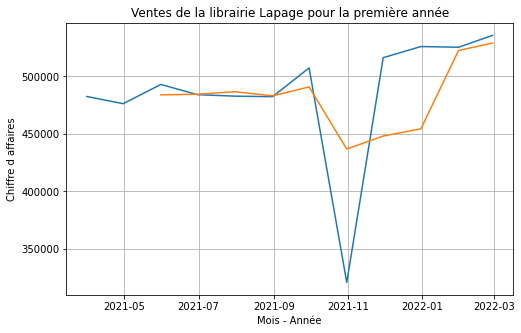

In [121]:
plt.figure(figsize = (8, 5))
plt.plot(ventes_mois_annee1)
plt.plot(mobile1)
plt.title('Ventes de la librairie Lapage pour la première année')
plt.xlabel('Mois - Année')
plt.ylabel('Chiffre d affaires')
plt.grid(True)
plt.show()
plt.savefig('evolution_ca1.pdf', dpi = 500); plt.close()

On constate une baisse importante d'environ un tiers du chiffre d'affaires en octobre 2021, comparativement aux autres mois.

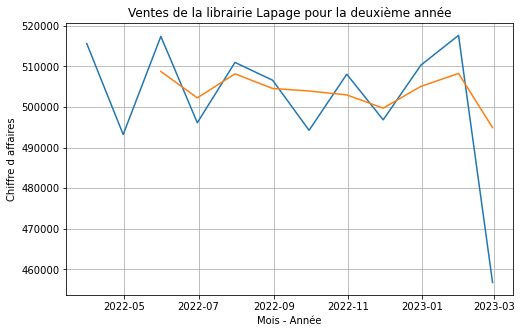

In [122]:
plt.figure(figsize = (8, 5))

plt.plot(ventes_mois_annee2)
plt.plot(mobile2)
plt.title('Ventes de la librairie Lapage pour la deuxième année')
plt.xlabel('Mois - Année')
plt.ylabel('Chiffre d affaires')
plt.grid(True)
plt.show()
plt.savefig('evolution_ca2.pdf', dpi = 600); plt.close()

On constate un chiffre d'affaires "en dents de scie" pour la deuxième année d'exercice, un emoyenne mobile légérement supérieure à 500K€, et une baisse plus marquée au mois de mars 2023.

# Baisse des ventes en octobre 2021 : Que s'est-il passé ?

In [123]:
# Isoler les valeurs du mois d'octobre

ventes_oct_J = ventes_annee1[(ventes_annee1['date'] > '2021-09-30') & (ventes_annee1['date'] < '2021-11-01')]
print("Nombre de ventes totales :",len(ventes_oct_J))

# Analyse par catégories
ventes_oct_categ = ventes_oct_J.groupby(['categ'])['price'].sum()
print("Ventes par catégories du mois d'octobre :", ventes_oct_categ)

# Comparaison avec le mois de novembre
ventes_nov_J = ventes_annee1[(ventes_annee1['date'] > '2021-10-31') & (ventes_annee1['date'] < '2021-12-01')]
print("Nombre de ventes totales :",len(ventes_nov_J))

ventes_nov_categ = ventes_nov_J.groupby(['categ'])['price'].sum()
print("Ventes par catégories du mois de novembre :", ventes_nov_categ)
print("")
print("Il semble y avoir un manque de chiffre d'affaires dans la catégorie 1. Continuons l'enquête !")

Nombre de ventes totales : 22917
Ventes par catégories du mois d'octobre : categ
0.0    209346.963414
1.0     40682.770000
2.0     89019.200000
Name: price, dtype: float64
Nombre de ventes totales : 29259
Ventes par catégories du mois de novembre : categ
0.0    162008.177735
1.0    260172.060000
2.0    110567.160000
Name: price, dtype: float64

Il semble y avoir un manque de chiffre d'affaires dans la catégorie 1. Continuons l'enquête !


In [124]:
# Comparaison du nombre de valeurs pour la catégorie 1

ventes_oct_J1 = sum(map(lambda x : x%2 == 1, ventes_oct_J['categ']))
print('Nombre de transactions pour la catégorie 1 en octobre 2021 : ', ventes_oct_J1)

ventes_nov_J1 = sum(map(lambda x : x%2 == 1, ventes_nov_J['categ']))
print('Nombre de transactions pour la catégorie 1 en novembre 2021 : ', ventes_nov_J1)

Nombre de transactions pour la catégorie 1 en octobre 2021 :  2008
Nombre de transactions pour la catégorie 1 en novembre 2021 :  12658


In [125]:
# Comparatif avec la catégorie 0
ventes_oct_J1 = sum(map(lambda x : x%2 == 1, ventes_oct_J['categ']))
print('Nombre de transactions pour la catégorie 1 en octobre 2021 : ', ventes_oct_J1)

ventes_oct_J0 = sum(map(lambda x : x%2 == 0, ventes_oct_J['categ']))
print('Nombre de transactions pour la catégorie 0 en octobre 2021 : ', ventes_oct_J0)

ventes_nov_J0 = sum(map(lambda x : x%2 == 0, ventes_nov_J['categ']))
print('Nombre de transactions pour la catégorie 0 en novembre 2021 : ', ventes_nov_J0)

Nombre de transactions pour la catégorie 1 en octobre 2021 :  2008
Nombre de transactions pour la catégorie 0 en octobre 2021 :  20909
Nombre de transactions pour la catégorie 0 en novembre 2021 :  16601


On observe très nettement un manque de ventes pour la catégorie 1 en octobre 2021.

In [126]:
# Vérification des dates de vente pour la catégorie en octobre 2021

ventes_oct_DbyD = ventes_oct_J.groupby(pd.Grouper(key='date', freq='D'))['price'].sum(['categ'] == '1')
print("Chiffre d'affaires moyen pour la catégorie 1 en octobre 2021 :", ventes_oct_DbyD.mean())
print(ventes_oct_DbyD)

Chiffre d'affaires moyen pour la catégorie 1 en octobre 2021 : 10595.279169201098
date
2021-09-30    18128.010000
2021-10-01    17058.340000
2021-10-02     9182.130000
2021-10-03     8993.050000
2021-10-04     9314.589547
2021-10-05     9390.460000
2021-10-06     9490.690000
2021-10-07     8191.080000
2021-10-08    10207.350000
2021-10-09     9425.360000
2021-10-10     8825.650000
2021-10-11    10230.560000
2021-10-12     8971.150000
2021-10-13     9427.220000
2021-10-14     9469.780000
2021-10-15     9416.284773
2021-10-16    10229.020000
2021-10-17     9557.980000
2021-10-18     9083.720000
2021-10-19     8636.619547
2021-10-20     9038.644773
2021-10-21     9571.790000
2021-10-22     8467.860000
2021-10-23     8910.640000
2021-10-24     9923.190000
2021-10-25     8076.040000
2021-10-26     9038.244773
2021-10-27     9789.530000
2021-10-28    14758.420000
2021-10-29    16453.630000
2021-10-30    15386.780000
2021-10-31    16405.120000
Freq: D, Name: price, dtype: float64


In [127]:
# Vérification des dates de vente pour la catégorie en octobre 2021

ventes_nov_J['date'] = pd.to_datetime(ventes_nov_J['date'])
ventes_nov_DbyD = ventes_nov_J.groupby(pd.Grouper(key='date', freq='D'))['price'].sum(['categ'] == '1')
print("Chiffre d'affaires moyen journalier pour la catégorie 1 en novembre 2021 :", ventes_nov_DbyD.mean())

Chiffre d'affaires moyen journalier pour la catégorie 1 en novembre 2021 : 17185.399926932492


/var/folders/gp/y1r_c8817xz9052n5c2hvkmw0000gn/T/ipykernel_6640/2990262216.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventes_nov_J['date'] = pd.to_datetime(ventes_nov_J['date'])


Ce manque de chiffre d'affaires pour la catégorie 1 en octobre est lissé sur l'ensemble du mois.
Plusieurs hypothèses peuvent être prises en compte...
> Problèmatique de design du site web pour cette catégorie de produits ? Défaut de référencement des produits ? Report des références de la catégorie 1 vers la catégorie 0 ? Opération commerciale des concurrents agressive ?

# Analyse des prix

Text(0.5, 1.0, 'Distribution de la variable price')

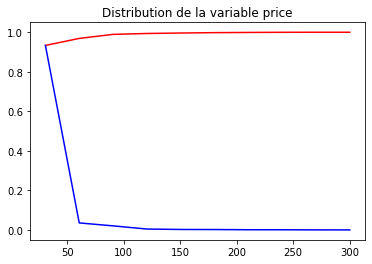

In [128]:
# Histogramme de distribution de la variable 'price'

# Import des données
count, bins_count = np.histogram(lapage_final['price'], bins=10)
  
# Comptage du nombre d'apparitions de la variable 'price'
prix = count / sum(count)
  
# Calcul de la fréquence d'apparitions pour chaque prix
cumul = np.cumsum(prix)
  
# Réprésentation graphique
plt.plot(bins_count[1:], cumul, color="red", label="Cumul")
plt.plot(bins_count[1:], prix, color="blue", label="Prix")
plt.title("Distribution de la variable price")

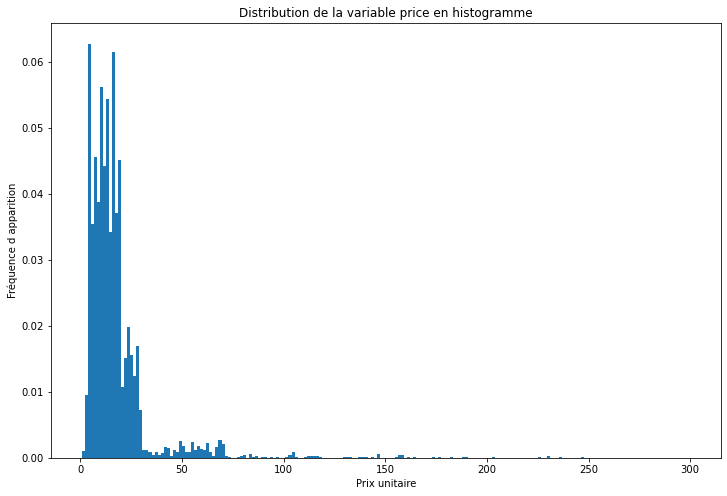

In [129]:
# Distribution de la variable price en histogramme

plt.figure(figsize=(12,8))
plt.hist(lapage_final['price'], bins=200, density=True)
plt.title("Distribution de la variable price en histogramme")
plt.xlabel('Prix unitaire')
plt.ylabel('Fréquence d apparition')
plt.show()

In [130]:
# Prix moyen :
moyenne_prix = sum(lapage_final['price'])/len(lapage_final['price'])
print("Données tirées de la variable price :")
print("")
print("Prix moyen :", moyenne_prix)

# Prix médian :
print("Prix médian :", statistics.median(lapage_final['price']))

# Prix modal
print("Prix modal :", lapage_final['price'].mode())

# Variance :
variance = np.var(lapage_final['price'])
print("Variance :", variance)

# Ecart type :
ecart_type_prix = np.std(lapage_final['price'])
print("Ecart-type :", ecart_type_prix )

Données tirées de la variable price :

Prix moyen : 17.45477349072619
Prix médian : 13.99
Prix modal : 0    15.99
dtype: float64
Variance : 335.84236334069243
Ecart-type : 18.326002382971918


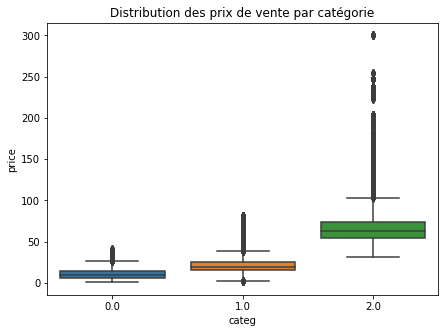

In [131]:
# Distribution des prix de vente par catégorie

plt.figure(figsize = (7, 5))
plt.title("Distribution des prix de vente par catégorie")
ax = sns.boxplot(y=lapage_final['price'], x=lapage_final['categ'], data=lapage_final) ; plt.show() 
plt.show()

La distribution des prix est claire et permet de distinguer les catégories de produits.
>Hypothèses : Catégorie 0 = Papeterie diverse
 // Catégorie 1 = Livres, romans...
// Catégorie 2 : Livres d'exceptions, liseuses...

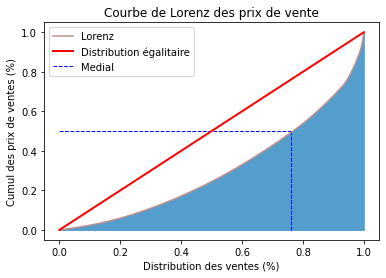

In [132]:
#Courbe de Lorenz sur la variables des prix
price = lapage_final['price'].values
#Sélection du sous-échantillon de travail que l'on appelle price

#On place les observations dans une variable
lorenz = np.cumsum(np.sort(price)) / price.sum()
#Tri des individus dans l'ordre croissant des valeurs de la variable, 
#Calcul de la somme cumulée et normalisation en divisant par la somme des observations

plt.plot(np.linspace(0,1,len(lorenz)), lorenz, drawstyle='steps-post', color='rosybrown', label='Lorenz')
plt.fill_between(np.linspace(0,1,len(lorenz)) ,lorenz , color='#539ecd')
plt.plot([0, 1], [0, 1], 'r-', lw=2, label='Distribution égalitaire')
plt.vlines(x=.76, ymin=0, ymax=.5, color='blue', linestyle='--', linewidth=1, label='Medial')
plt.hlines(xmin=.76, xmax=0, y=.5, color='blue', linestyle='--', linewidth=1)

plt.title('Courbe de Lorenz des prix de vente')
plt.xlabel("Distribution des ventes (%)")
plt.ylabel("Cumul des prix de ventes (%)")
plt.legend(loc="best")

plt.savefig("lorenz.png")
plt.show()

In [133]:
#Aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
aire_price = lorenz[:-1].sum()/len(lorenz) 

#Aire entre la 1e bissectrice et la courbe de Lorenz
S = 0.5 - aire_price 
gini = round(2*S, 2)

print("L'indice de Gini est égal à {}".format(gini),". Ce qui signifie qu'il y a une égalité moyenne entre les différentes tranches d'âge.")

L'indice de Gini est égal à 0.4 . Ce qui signifie qu'il y a une égalité moyenne entre les différentes tranches d'âge.


# Déclinaison du chiffre d'affaires par catégorie

In [134]:
#Calcul chiffre d'affaires par catégories et par années

ventes2 = (lapage_final['price'].groupby(lapage_final['categ'])).sum()
print("Résultats globaux par catégorie :", ventes2)
print("")

# Répartition par années

ventes_annee1_categ = (ventes_annee1['price'].groupby(ventes_annee1['categ'])).sum()
print("Première année par catégorie :",ventes_annee1_categ)
print("")
ventes_annee2_categ = (ventes_annee2['price'].groupby(ventes_annee2['categ'])).sum()
print("Deuxième année par catégorie :", ventes_annee2_categ)

Résultats globaux par catégorie : categ
0.0    4.423588e+06
1.0    4.653723e+06
2.0    2.780275e+06
Name: price, dtype: float64

Première année par catégorie : categ
0.0    2.232226e+06
1.0    2.247384e+06
2.0    1.353924e+06
Name: price, dtype: float64

Deuxième année par catégorie : categ
0.0    2.191362e+06
1.0    2.406338e+06
2.0    1.426351e+06
Name: price, dtype: float64


Evolutions constatées pour les catégories 1 et 2 d'une année à l'autre. Stagnation pour la catégorie 0.

In [135]:
# Répartition du nombre de produits et du chiffre d'affaires total par catégories

nbre_prod = lapage_final.groupby('categ').id_prod.nunique()
pourc = nbre_prod.index
tableau_categ = pd.DataFrame(pourc, columns = ['categ'])
tableau_categ["Nombre"] = nbre_prod.values
tableau_categ["Pourcentage"] = tableau_categ["Nombre"] / (tableau_categ["Nombre"].sum()) * 100
print("Le nombre de références par catégorie et en pourcentage :", tableau_categ)

Le nombre de références par catégorie et en pourcentage :    categ  Nombre  Pourcentage
0    0.0    2293    70.208206
1    1.0     737    22.565830
2    2.0     236     7.225964


In [136]:
#Test Shapiro

shapiro(tableau_categ)

ShapiroResult(statistic=0.5851583480834961, pvalue=6.406078318832442e-05)

Le catalogue produits de la boutique Lapage est composé à 70,2% de produits de catégorie 0, 22,6% de catégorie 1, et 7,2% de catégorie 2.

Voyons ce que ces catégories représentes en terme de ventes et de chiffre d'affaires...

# Tendances générales :

# Représentation graphique des catégories

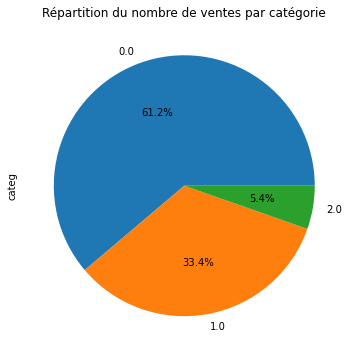

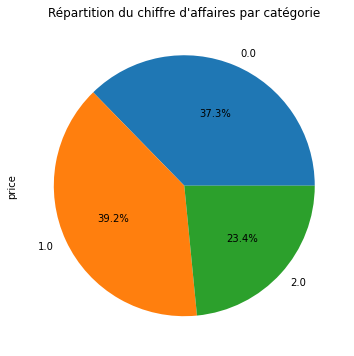

In [137]:

#Représentation des catégories selon le nombre de ventes
plt.figure(figsize = (6, 6))
lapage_final['categ'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Répartition du nombre de ventes par catégorie")
plt.show()

#Représentation des catégories selon le chiffre d'affaires
plt.figure(figsize = (6, 6))
ventes2.plot(kind='pie', autopct='%1.1f%%')
plt.title("Répartition du chiffre d'affaires par catégorie")
plt.show()

# Analyse démographique de la clientèle

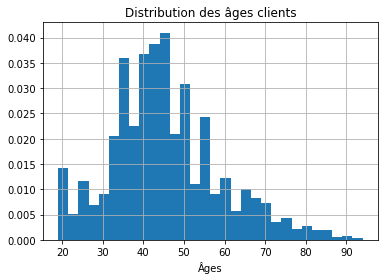

In [138]:
#Ajout d'une colonne'age' pour faciliter l'analyse
lapage_final['age'] = 2023 - lapage_final.birth

# Histogramme de la distribution de l'âge clients
lapage_final['age'].hist(density=True, alpha=1, bins=30)

plt.xlabel('Âges')
plt.title('Distribution des âges clients')
plt.savefig("ages_clients.png")
plt.show()

In [139]:
shapiro(lapage_final['age'])

/Users/erwandaniel/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9742044806480408, pvalue=0.0)

La majorité de la clientèle actuelle de la boutique est agée de 30 à 55 ans.

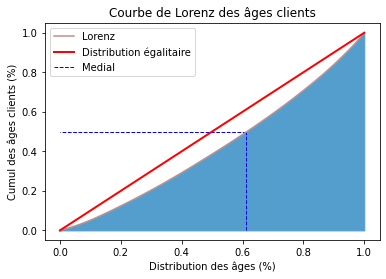

In [140]:
#Courbe de Lorenz sur la variable des âges 
age = lapage_final['age'].values
# Sélection du sous-échantillon de travail que l'on appelle ages

#On place les observations dans une variable
lorenz_age = np.cumsum(np.sort(age)) / age.sum()
#Tri des individus dans l'ordre croissant des valeurs de la variable, 
#Calcul de la somme cumulée et normalisation en divisant par la somme des observations

plt.plot(np.linspace(0,1,len(lorenz_age)), lorenz_age, drawstyle='steps-post', color='rosybrown', label='Lorenz')
plt.fill_between(np.linspace(0,1,len(lorenz_age)) ,lorenz_age , color='#539ecd')
plt.plot([0, 1], [0, 1], 'r-', lw=2, label='Distribution égalitaire')
plt.vlines(x=.61, ymin=0, ymax=.5, color='blue', linestyle='--', linewidth=1, label='Medial')
plt.hlines(xmin=.61, xmax=0, y=.5, color='blue', linestyle='--', linewidth=1)

plt.title('Courbe de Lorenz des âges clients')
plt.xlabel("Distribution des âges (%)")
plt.ylabel("Cumul des âges clients (%)")

plt.legend(loc="best")
plt.savefig("lorenz_age.png")
plt.show()

In [141]:
#Aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
aire_age = lorenz_age[:-1].sum()/len(lorenz_age) 

#Aire entre la 1e bissectrice et la courbe de Lorenz
S = 0.5 - aire_age
gini_age = round(2*S, 2)

print("L'indice de Gini est égal à {}".format(gini_age))

L'indice de Gini est égal à 0.17


In [142]:
#Méthode .value_counts() pour avoir une idée rapide de la répartition homme/femme chez les clients
nbre_sex = lapage_final['sex'].groupby(lapage_final['session_id']).value_counts()
nbre_sex = nbre_sex.groupby('sex').count()
print("Répartition Hommes/Femmes :")
nbre_sex

Répartition Hommes/Femmes :


sex
f    169457
m    172858
Name: sex, dtype: int64

In [143]:
#Création du tableau de contingence "Matrice des valeurs observées"
#Variables 'sex' et 'categ' du dataframe df
X = 'sex'
Y = 'categ'

#Calcul du tableau de contigence par la méthode .pivot_table()
c = lapage_final[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len) ###, margins=True, margins_name='Total'
tx = lapage_final[X].value_counts()
ty = lapage_final[Y].value_counts()

#Création d'une copie du dataframe original
cont = c.copy()
cont

categ,0.0,1.0,2.0
sex,,,
f,206220,114899,17283
m,209460,112270,19200


In [144]:
#Création de la "Matrice des valeurs attendues"
#L’occurrence attendue est simplement la fréquence que l’on devrait trouver dans une cellule 
#si l’hypothèse nulle était vraie.
tx_df= pd.DataFrame(tx)
ty_df = pd.DataFrame(ty)

tx_df.columns = ["s"]
ty_df.columns = ["s"]

#Valeurs totales observées
n = len(lapage_final)

# Pivot d'une des deux séries.
ind = (tx_df.dot(ty_df.T) / n)
ind

,0.0,1.0,2.0
m,208613.435551,114007.182306,18309.382143
f,207066.564449,113161.817694,18173.617857


In [145]:
#Matrice "écart au carré normalisé de la valeur attendue VS valeur observée"
mesure = (c-ind)**2/ind
mesure

categ,0.0,1.0,2.0
f,3.461068,26.668027,43.645694
m,3.435404,26.470283,43.322061


In [146]:
#Calcul du Khi2
#Tester l’hypothèse nulle consiste à comparer les occurrences observées (celles déjà dans le tableau) 
#avec les occurrences attendues.
khi2 = mesure.sum().sum()
khi2

147.00253568681114

In [147]:
#Calcul du khi2 et de la p-value à partir de la matrice des valeurs observées avec scipy 
#Degré de liberté = (nombre de lignes – 1) X (nombre de colonnes – 1)
khi2, pvalue, degrees, expected = stats.chi2_contingency(cont)
khi2, degrees, pvalue

(147.00253568681114, 2, 1.1989607410166063e-32)

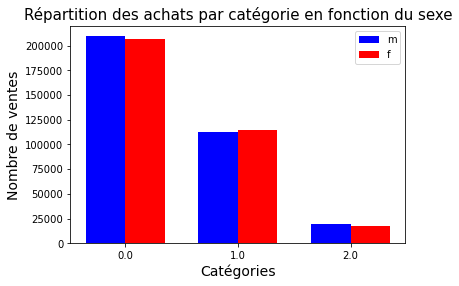

In [148]:
# Création du groupe "sex", et décompte des individus de chaque sous-groupe
g = lapage_final.groupby('sex')
c_female = g.get_group('f')['categ'].value_counts()
c_male = g.get_group('m')['categ'].value_counts()

# On extrait les noms des différents hairpattern et des différents sexes
categ = lapage_final['categ'].value_counts().index
genre = lapage_final['sex'].value_counts().index
pos = np.arange(len(categ))
width = 0.35  # épaisseur de chaque bâton

# Création du diagramme en bâtons (bâtons côte à côte)
plt.bar(pos - width/2, c_male, width, color='blue')
plt.bar(pos + width/2,c_female, width, color='red')
plt.xticks(pos, categ)
plt.xlabel('Catégories', fontsize=14)
plt.ylabel('Nombre de ventes', fontsize=14)
plt.title('Répartition des achats par catégorie en fonction du sexe',fontsize=15)
plt.legend(genre,loc=1)
plt.savefig("sex_categ.png")
plt.show()

# Top et flop des références produits

In [150]:
# Top et flop au niveau des références produits

top_prod = lapage_final.groupby('id_prod').count().reset_index()
top_prod['nbre_ventes'] = top_prod.session_id
top_prod = top_prod[['id_prod', 'nbre_ventes']]
graph_prod = top_prod.sort_values(by=['nbre_ventes']).tail(10)
print(top_prod.sort_values(by=['nbre_ventes']))

     id_prod  nbre_ventes
1793   0_549            1
1327  0_2201            1
3176    2_23            1
313   0_1284            1
752   0_1683            1
...      ...          ...
2654   1_425         2096
2734   1_498         2128
2642   1_414         2180
2645   1_417         2189
2592   1_369         2252

[3266 rows x 2 columns]


In [207]:
# Nombre de ventes par catégories
top_cat = lapage_final.groupby('categ').count().reset_index()
top_cat['nbre_ventes'] = top_cat.session_id
top_cat = top_cat[['categ', 'nbre_ventes']]
graph_cat = top_cat.sort_values(by=['nbre_ventes']).tail(10)
print(top_cat.sort_values(by=['nbre_ventes']))

   categ  nbre_ventes
2    2.0        36483
1    1.0       227169
0    0.0       415680


In [209]:
#Test Shapiro du nombre de ventes par catégories
stats.shapiro(top_cat['nbre_ventes'])

ShapiroResult(statistic=0.9999890327453613, pvalue=0.9936739206314087)

Le resultat du test de Shapiro me permet de rejeter l'hypothèse H₀. Je passe ensuite le test de Kruskal-Wallis.

In [225]:
# Division de la table en sous-catégorie 

categ0 = top_cat[top_cat['categ']== 0]['nbre_ventes']

categ1 = top_cat[top_cat['categ']== 1]['nbre_ventes']

categ2 = top_cat[top_cat['categ']== 2]['nbre_ventes']

In [229]:
# Vérification des données

print(categ0)
print(categ1)
print(categ2)

0    415680
Name: nbre_ventes, dtype: int64
1    227169
Name: nbre_ventes, dtype: int64
2    36483
Name: nbre_ventes, dtype: int64


In [230]:
#Test Kruskall-Wallis

stats.kruskal(categ0, categ1, categ2)

KruskalResult(statistic=2.0, pvalue=0.36787944117144245)

In [151]:
top_prod.sort_values(by=['nbre_ventes']).head(10)

,id_prod,nbre_ventes
1793,0_549,1
1327,0_2201,1
3176,2_23,1
313,0_1284,1
752,0_1683,1
2109,0_833,1
3264,2_98,1
698,0_1633,1
665,0_1601,1
3248,2_81,1


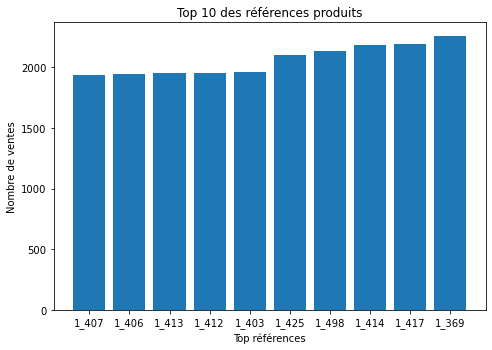

In [152]:
# Visualisation du Top 10 références

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
etiquettes = graph_prod['id_prod']
valeurs = graph_prod['nbre_ventes']
ax.bar(etiquettes, valeurs)
plt.title('Top 10 des références produits')
plt.ylabel('Nombre de ventes')
plt.xlabel('Top références')
plt.show()

In [153]:
# Top en chiffre d'affaires

top_caprod = lapage_final.groupby(['id_prod']).sum(['price']).reset_index()
top_caprod['ca'] = top_caprod.price
top_caprod = top_caprod.drop(['birth', 'age', 'categ', 'ca'], axis=1)
graph_caprod = top_caprod.sort_values(by=['price']).tail(10)
print(graph_caprod)

     id_prod  Unnamed: 0     price
3105   2_166    98346418  52449.12
3202    2_39   393874843  53060.85
3044   2_110   374349242  53846.25
2592   1_369   815492617  54025.48
2620   1_395   662190110  54356.25
3153   2_209   347659980  56971.86
3035   2_102   456594962  60736.78
3046   2_112   415075883  65407.76
3071   2_135   439669371  69334.95
3097   2_159   244208036  94893.50


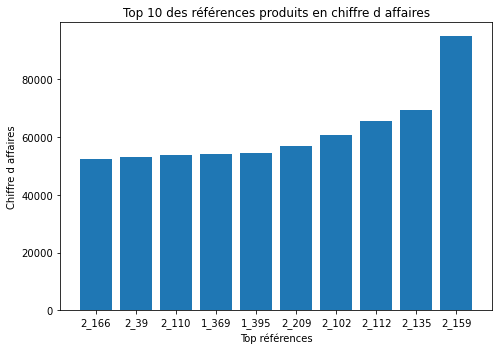

In [154]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
etiquettes4 = graph_caprod['id_prod']
valeurs4 = graph_caprod['price']
ax.bar(etiquettes4, valeurs4)
plt.title('Top 10 des références produits en chiffre d affaires')
plt.ylabel('Chiffre d affaires')
plt.xlabel('Top références')
plt.show()

In [155]:
# Flop en chiffre d'affaires

print(top_caprod.sort_values(by=['price']).head(10))

     id_prod  Unnamed: 0  price
595   0_1539       94030   0.99
313   0_1284      568408   1.38
719   0_1653      161911   1.98
1785   0_541      309409   1.99
2080   0_807      607704   1.99
665   0_1601      325685   1.99
802   0_1728      477929   2.27
549   0_1498       95196   2.48
2180   0_898      667628   2.54
925   0_1840      220151   2.56


Les produits de la catégorie 2 représentent la majorité des best sellers en terme de chiffre d'affaires avec 2 références de la catégorie 1. 

# Qui achète sur le site internet de la boutique LAPAGE?

Quelques analyses plus poussées doivent être faites afin de mieux cibler la clientèle.

Nous allons donc étudier la clientèle avec toutes les données en notre possession :
- Analyse Heatmap des corrélations possibles
- Analyse de la fidélisation client
- Top 10 clients (en nombre d'achats et en CA)
- Répartition du CA en fonction des catégories de produits et de l'âge
- Corrélation entre l'âge et la catégorie du produit
- Répartition du CA global en fonction de l'âge
- Prix et âge moyen par catégories
- Âge et fréquence d'achat
- Âge et panier moyen
- Evolution du chiffre d'affaires par catégorie et répartition par sexe

# Caractéristiques de la fidélisation client

Comme nous l'avons vu précédemment, le sexe n'influe pas sur la catégorie de produits. Voyons maintenant la corrélation entre l'âge, la catégorie d'achats, le panier moyen, la fréquence d'achats de l'ensemble des clients.

Commençons dans un premier temps par visualiser les différentes corrélations qu'il puisse y avoir entre les différentes variables.

In [156]:
# Préparation de la table pour une visualisation Heatmap

lapage_final.corr().head()

,Unnamed: 0,birth,price,categ,age
Unnamed: 0,1.000000,-0.023842,0.110014,0.145200,0.023842
birth,-0.023842,1.000000,0.209443,0.099222,-1.000000
price,0.110014,0.209443,1.000000,0.671692,-0.209443
categ,0.145200,0.099222,0.671692,1.000000,-0.099222
age,0.023842,-1.000000,-0.209443,-0.099222,1.000000


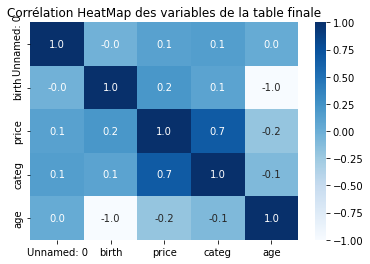

In [157]:
#Méthode .corr() avec par défaut la formule de la corrélation linéaire de Pearson

sns.heatmap(lapage_final.corr(), annot=True, fmt=".1f", cmap='Blues')
plt.title('Corrélation HeatMap des variables de la table finale')
plt.savefig("heatmap_global.png")
plt.show()

Ce HeatMap nous montre une première image des possibles corrélations linéaires. Nous voyons notamment que les prix des produits sont fortement corrélés à leur catégories respectives.

In [158]:
# Création d'une table des 10 meilleurs clients

top_cli = lapage_final.groupby('client_id').count().reset_index()
top_cli['nbre_achats'] = top_cli.session_id
top_cli = top_cli[['client_id', 'nbre_achats']]
graph_cli = top_cli.sort_values(by=['nbre_achats']).tail(10)
print(top_cli.sort_values(by=['nbre_achats'], ascending = False))

     client_id  nbre_achats
677     c_1609        25488
6337    c_6714         9187
2724    c_3454         6773
4388    c_4958         5195
2513    c_3263          403
...        ...          ...
1556     c_240            1
5501    c_5962            1
8151    c_8351            1
3855    c_4478            1
5868    c_6292            1

[8600 rows x 2 columns]


In [159]:
# Nombre total de clients
print("Nombre total de clients :",top_cli.shape[0])

# Clients ayant passés une seule commande
print("Clients ayant passés une seule commande :",top_cli[top_cli['nbre_achats'] == 1].shape[0])

# Clients ayant passés 2 commandes
print("Clients ayant passés 2 commandes :",top_cli[top_cli['nbre_achats'] == 2].shape[0])

# Clients ayant passés plus de deux commandes
print("Clients ayant passés plus de deux commandes ou plus :",top_cli[top_cli['nbre_achats'] > 2].shape[0])

# Pourcentage de clients fidélisés
print("Pourcentage de fidélisation :", (top_cli[top_cli['nbre_achats'] > 1].shape[0])/(top_cli.shape[0])*100)

Nombre total de clients : 8600
Clients ayant passés une seule commande : 8
Clients ayant passés 2 commandes : 42
Clients ayant passés plus de deux commandes ou plus : 8550
Pourcentage de fidélisation : 99.90697674418605


Le but, étant donné le fort taux de fidélisation, sera de conserver ces clients fidèles, de les amener vers un panier moyen plus élevé en nombre d'articles et en chiffre d'affaires, tout en cherchant de nouveaux prospects et de nouveaux clients.

In [160]:
# Liste des 10 meilleurs clients

graph_cli

,client_id,nbre_achats
7120,c_7421,379
708,c_1637,380
1197,c_2077,384
1772,c_2595,398
1268,c_2140,402
2513,c_3263,403
4388,c_4958,5195
2724,c_3454,6773
6337,c_6714,9187
677,c_1609,25488


In [202]:
stats.shapiro(top_cli['nbre_achats'])

/Users/erwandaniel/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.0677717924118042, pvalue=0.0)

Les meilleurs clients ont achetés entre 379 et 25488 articles en deux ans.

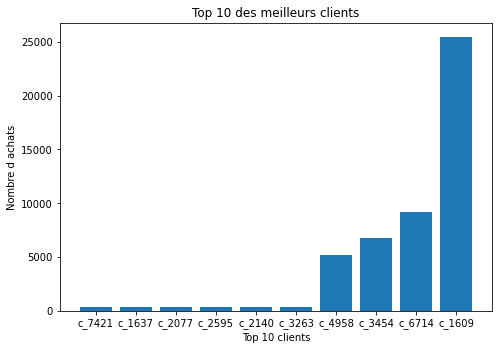

In [161]:
# Visualisation du Top 10 clients en nombre d'achats

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
etiquettes1 = graph_cli['client_id']
valeurs1 = graph_cli['nbre_achats']
ax.bar(etiquettes1, valeurs1)
plt.title('Top 10 des meilleurs clients')
plt.ylabel('Nombre d achats')
plt.xlabel('Top 10 clients')
plt.show()

In [162]:
# Top 10 des meilleurs clients en chiffre d'affaires

top_cli_ca = lapage_final.groupby(['client_id']).sum(['price']).reset_index()
top_cli_ca = top_cli_ca.drop(['birth', 'age', 'categ'], axis=1)

graph_cli_ca = top_cli_ca.sort_values(by=['price']).tail(10)
graph_cli_ca

,client_id,Unnamed: 0,price
7791,c_8026,93154438,5100.034773
7006,c_7319,52241252,5155.770000
1268,c_2140,136406439,5208.820000
2108,c_2899,40506795,5214.050000
634,c_1570,71781939,5271.620000
2513,c_3263,31656456,5276.870000
2724,c_3454,421260281,113690.294320
6337,c_6714,46256545,153703.648641
4388,c_4958,83244680,289760.340000
677,c_1609,899841096,324033.350000


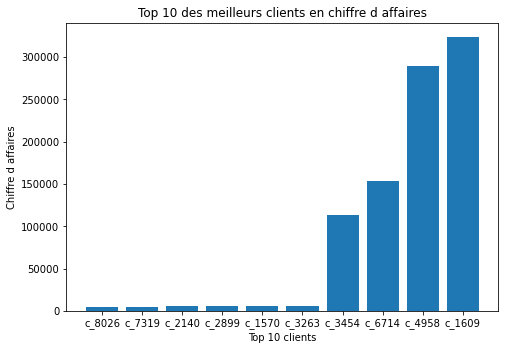

In [163]:
# Visualisation du top 10 clients en chiffre d'affaires

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
etiquettes2 = graph_cli_ca['client_id']
valeurs2 = graph_cli_ca['price']
ax.bar(etiquettes2, valeurs2)
plt.title('Top 10 des meilleurs clients en chiffre d affaires')
plt.ylabel('Chiffre d affaires')
plt.xlabel('Top 10 clients')
plt.show()

Les quatre meilleurs clients rapportent à l'entreprise plus de 850K €. Il doit certainement s'agir d'une clientèle de professionnels, d'associations ou d'établissements publics qui s'approvisionnent à la librairie Lapage. Il est indispensable de garder cette clientèle et, dans la mesure du possible, de la développer par la prescription et la recommandation.

# Répartition du chiffre d'affaires selon l'âge et les catégories

In [164]:
# Age et chiffre d'affaires total en fonction des catégories d'achat

# Création d'une table temporaire
fre_age = lapage_final.groupby(['age', 'categ']).sum(lapage_final.session_id.count())
fre_age = fre_age.drop(['birth'], axis=1)
fre_age

Unnamed: 0      price
age categ                       
19  0.0    1594179424   35914.36
    1.0    2715501306  118362.47
    2.0    2835012043  454736.86
20  0.0     474277417    9560.43
    1.0     863179101   34435.66
...               ...        ...
93  1.0      85533839    3074.34
    2.0       1104242     111.98
94  0.0      36588909     716.76
    1.0      58421413    2359.10
    2.0        432994     145.99

[228 rows x 2 columns]

In [165]:
# Création d'une table utilisable pour la visualisation

fre_age2 = fre_age.groupby(['age', 'categ']).sum('price').reset_index()
fre_age2

,age,categ,Unnamed: 0,price
0,19,0.0,1594179424,35914.36
1,19,1.0,2715501306,118362.47
2,19,2.0,2835012043,454736.86
3,20,0.0,474277417,9560.43
4,20,1.0,863179101,34435.66
...,...,...,...,...
223,93,1.0,85533839,3074.34
224,93,2.0,1104242,111.98
225,94,0.0,36588909,716.76
226,94,1.0,58421413,2359.10


Text(0.5, 0, 'Age des clients')

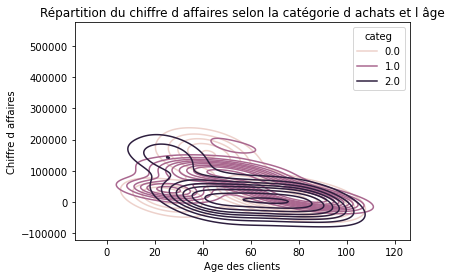

In [166]:
# Utilisation de la table et visualisation en Kernel density

sns.kdeplot(data=fre_age2, x="age", y="price",  hue="categ", levels=10, thresh=.1,)
plt.title('Répartition du chiffre d affaires selon la catégorie d achats et l âge')
plt.ylabel('Chiffre d affaires')
plt.xlabel('Age des clients')

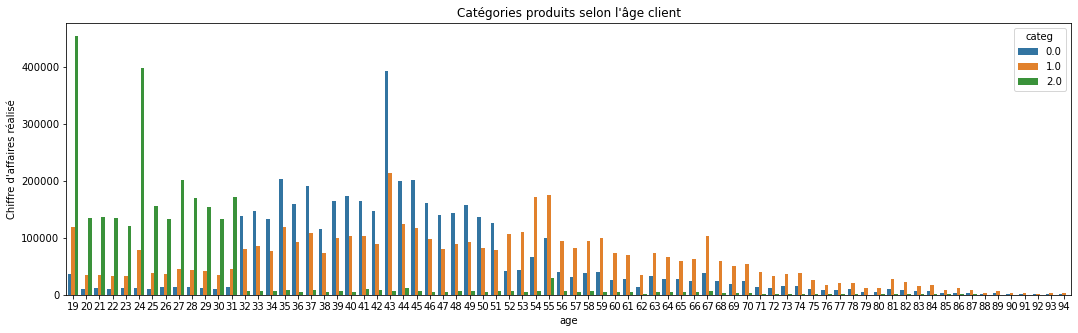

In [167]:
#Visualisation rapide avec une BarPlot Seaborn
fig, ax = plt.subplots(figsize=(18, 5))
sns.barplot(x="age", y="price",hue="categ", data=fre_age2)

ax.set_xlabel('age')
ax.set_ylabel('Chiffre d\'affaires réalisé')
ax.set_title('Catégories produits selon l\'âge client')

plt.savefig("barplot_categorie_produit_age_client")
plt.show()

Nous observons très nettement des tendances se dessiner :
- Les 18-31 ans sont les plus gros consommateurs des produits de catégorie 2
- La catégorie 0 est très représentée entre 32 ans et 51 ans
- Le chiffre d'affaires de la catégorie 1 est très achetée par les 32 à 67 ans.

Quelques données semblent intéressantes pour des promotions ciblées :
- Les personnes agées de 19 et 24 ans réalisent plus du double du chiffre d'affaires de la moyenne de leur âge, déjà trsès acheteuse de cette catégorie.
- Les personnes agées de 43 ans réalisent environ 400K€ de CA pour la catégorie 0

# Corrélation entre l'âge et la catégorie de produits

Afin de simplifier l'analyse, il est nécessaire de procéder par un découpage en classes (discrétisation). Le but recherché est de classer la clientèle par groupes d'âges de manière à interpréter plus clairement les résultats.

In [168]:
#N est le nombre d'observations, ici représentées par les valeurs transactionnelles par âge et par catégorie
len(lapage_final.groupby(['age', 'categ']).count().reset_index())

228

In [169]:
#Formule de Huntsberger : 1 + 3,3*log10(N)
1 + ((10/3) * math.log10(228))

8.859782823334847

In [170]:
#Formule de Brooks-Carruthers : 5*log10(N)
5 * math.log10(228)

11.78967423500227

In [171]:
#Aggrégation des données selon l'âge et la catégorie
age_cat = lapage_final.groupby(['age', 'categ']).count().reset_index()
age_cat = age_cat[['age', 'categ', 'session_id']]
age_cat.head()

,age,categ,session_id
0,19,0.0,3418
1,19,1.0,5719
2,19,2.0,6012
3,20,0.0,909
4,20,1.0,1678


In [172]:
# Création des 10 groupes d'âges
age_cat['age']= pd.cut(age_cat['age'], 10)
age_cat = age_cat.groupby(['age','categ']).sum().reset_index()
age_cat.head(10)

,age,categ,session_id
0,"(18.925, 26.5]",0.0,10854
1,"(18.925, 26.5]",1.0,19687
2,"(18.925, 26.5]",2.0,22072
3,"(26.5, 34.0]",0.0,44982
4,"(26.5, 34.0]",1.0,22000
5,"(26.5, 34.0]",2.0,11331
6,"(34.0, 41.5]",0.0,110304
7,"(34.0, 41.5]",1.0,34301
8,"(34.0, 41.5]",2.0,527
9,"(41.5, 49.0]",0.0,145418


In [173]:
#Coefficient de corrélation eta carré
X = "categ" #qualitative
Y = "age" #quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

In [174]:
round(eta_squared(age_cat.age, age_cat.session_id), 2)

0.35

*Le rapport de corrélation est proche de 0.40, ce qui précise le précédent graphique dans lequel une certaine corrélation entre les catégories et l'âge client. Il est perceptible de voir le lien que peut avoir une catégorie en fonction d'une tranche d'âges, avec par exemple un fort succès de la catégorie 0 pour les 34 / 44 ans, ou à l inverse une clientèle plus âgée n adhère quasiment pas à cette catégorie, etc..*

# Âge et chiffre d'affaires global

In [175]:
# Age et chiffre d'affaires

pan_age = fre_age.groupby('age').sum('price').reset_index()
print(pan_age)

    age  Unnamed: 0          price
0    19  7144692773  609013.690000
1    20  2276144050  178195.780000
2    21  2102575361  184229.714320
3    22  2093488933  178497.700000
4    23  2085847677  165042.889547
..  ...         ...            ...
71   90   151574222    5271.804773
72   91    99341060    5043.190000
73   92    51959545    2815.450000
74   93   130231037    4013.870000
75   94    95443316    3221.850000

[76 rows x 3 columns]


In [176]:
pan_age['price'] = pan_age['price'] / 1000

Text(0.5, 1.0, 'Chiffre d affaires et âge')

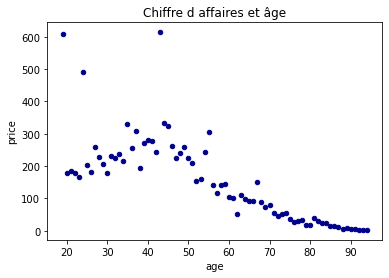

In [177]:
ax1 = pan_age.plot.scatter('age', 'price', c='DarkBlue', marker= "o")
plt.title('Chiffre d affaires et âge')

In [178]:
shapiro(pan_age)

ShapiroResult(statistic=0.5866405963897705, pvalue=5.0416715764180937e-23)

In [179]:
#Coefficient de corrélation linéaire de Pearson
coef_age_price = stats.pearsonr(pan_age.age, pan_age.price)[0]
print ("Coefficient de Pearson :", coef_age_price)

Coefficient de Pearson : -0.7788469792269561


Nous pouvons remarquer, avec le test de corrélation de pearson, que plus l'âge des clients est élevé, plus le montant des achats est faible en chiffre d'affaires global.

Nous voyons clairement les grandes tendances se dessiner :
- La grande majorité du chiffre d'affaires de la catégorie 2 est généré par les 20/50 ans
- La catégorie 0 est représentée par les actifs de 25 à 65 ans
- Les achats de la catégorie 1 sont étalés sur toutes les tranches d'âge

Nous pouvons constater également de manière générale qu'au délà de 70-80 ans, le chiffre d'affaires est en déclin. Ce qui est tout à fait logique, comme vu précédemment.

In [180]:
# Age moyen et panier moyen par catégorie d'articles préférées

cat_age = lapage_final.groupby(['categ']).mean(['age'])
cat_age = cat_age.drop(['birth', 'Unnamed: 0'], axis=1)
print("Prix moyen et âge moyen par catégorie :", cat_age)

Prix moyen et âge moyen par catégorie :            price        age
categ                      
0.0    10.641812  44.897616
1.0    20.485730  48.651238
2.0    76.207412  26.948031


Le prix moyen le plus élevé se retrouve dans la catégorie 2 avec un prix moyen d'achat de 76€, comme vu précédemment. A destination d'une clientèle plus jeune que les autres catégories avec une moyenne de 27 ans.

# Age et fréquence d'achat

In [181]:
#Agrégation des données selon l'âge client
#Le nombre d'achat mensuel est obtenu à partir du comptage des sessions clients par mois
#Hypothèse 1 id_session = 1 transation
cli_freq = lapage_final.groupby('age').count().reset_index()
cli_freq = cli_freq[['age', 'session_id']]

#Création d'une variable fréquence 'f'
cli_freq['frequence'] = cli_freq['session_id'] / sum(cli_freq['session_id'])
cli_freq.sort_values(by='age', ascending=False).head(10)

,age,session_id,frequence
75,94,201,0.000296
74,93,226,0.000333
73,92,170,0.000250
72,91,311,0.000458
71,90,327,0.000481
70,89,555,0.000817
69,88,272,0.000400
68,87,757,0.001114
67,86,942,0.001387
66,85,834,0.001228


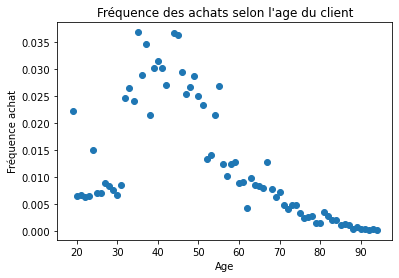

In [182]:
#Visualisation avec un scatterplot (âge client vs fréquence d'achat mensuelle)
#cli_freq.plot.scatter(x = 'age', y = 'f', marker = 'o', color='purple')
plt.plot(cli_freq[cli_freq.frequence < .05].age, cli_freq[cli_freq.frequence < .05].frequence, 'o')

plt.xlabel('Age')
plt.ylabel('Fréquence achat')
plt.title('Fréquence des achats selon l\'age du client')

plt.savefig("scatterplot_frequence_achat_age_client.png")
plt.show()

In [183]:
shapiro(cli_freq)

ShapiroResult(statistic=0.5292772054672241, pvalue=2.4412756160434343e-24)

In [184]:
#Coefficient de corrélation linéaire de Pearson
coef_cli_freq = stats.pearsonr(cli_freq.age, cli_freq.frequence)[0]
print ("Coefficient de Pearson :", coef_cli_freq)

Coefficient de Pearson : -0.5337045762407477


Il existe bien un lien entre l'âge des clients et la fréquence de leurs achats. Il semblerait que les clients entre 30 et 50 ans effectuent plus d'achats que les autres tranches d'âge.

# Age et panier moyen

In [185]:
#Première agrégation selon l'age client et les sessions en comptage de modalités
age_pan = lapage_final.groupby(['age', 'session_id']).count().reset_index()

#Seconde agrégation selon l'age client en moyenne de produits achetés 
age_pan = age_pan.groupby('age').mean().reset_index()
age_pan = age_pan[['age', 'id_prod']]
age_pan.tail()

,age,id_prod
71,90,1.397436
72,91,1.509709
73,92,1.770833
74,93,1.547945
75,94,1.500000


In [186]:
shapiro(age_pan)

ShapiroResult(statistic=0.804015040397644, pvalue=5.412080831233845e-13)

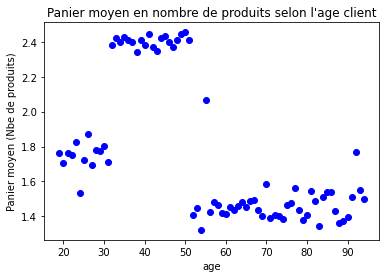

In [187]:
#Visualisation avec un scatterplot (âge client vs taille panier moyen)
plt.plot(age_pan.age, age_pan.id_prod, 'o', color='blue')

plt.xlabel('age')
plt.ylabel('Panier moyen (Nbe de produits)')
plt.title('Panier moyen en nombre de produits selon l\'age client')

plt.savefig("scatterplot_panier_moyen_age_client.png")
plt.show()

# Evolution du chiffre d'affaires dans le temps

In [188]:
# Création de deux tables distinctes par années d'exercice

ventes_annee1b = ventes_annee1.groupby(['sex', 'categ', 'date']).sum(['price']).reset_index()
ventes_annee1b

ventes_annee2b = ventes_annee2.groupby(['sex', 'categ', 'date']).sum(['price']).reset_index()
ventes_annee2b

,sex,categ,date,Unnamed: 0,birth,price
0,f,0.0,2022-03-01 00:04:52.633371,208422,1975,5.22
1,f,0.0,2022-03-01 00:08:27.670968,208564,1975,6.84
2,f,0.0,2022-03-01 00:18:14.209692,232162,1991,9.99
3,f,0.0,2022-03-01 00:34:08.032304,295642,1987,8.09
4,f,0.0,2022-03-01 00:42:00.852668,489793,1984,19.41
...,...,...,...,...,...,...
342039,m,2.0,2023-02-28 20:19:12.251029,663257,2001,139.99
342040,m,2.0,2023-02-28 21:16:10.795432,14133,1999,54.87
342041,m,2.0,2023-02-28 21:45:26.670082,13485,1999,59.14
342042,m,2.0,2023-02-28 23:08:40.035146,13530,1999,50.99


In [189]:
# Regroupement par dates à l'échelle mensuelle, avec le sexe et la catégorie de produits

ventes_annee1m = ventes_annee1b.groupby([pd.Grouper(key='date', freq='m'), 'sex', 'categ']).sum('price')
ventes_annee1mok = ventes_annee1m.drop(['birth', 'Unnamed: 0'], axis=1)
ventes_annee1mok

ventes_annee2m = ventes_annee2b.groupby([pd.Grouper(key='date', freq='m'), 'sex', 'categ']).sum('price')
ventes_annee2mok = ventes_annee2m.drop(['birth', 'Unnamed: 0'], axis=1)
ventes_annee2mok

price
date       sex categ               
2022-03-31 f   0.0     96107.929094
               1.0    106351.990000
               2.0     53218.390000
           m   0.0     95549.013414
               1.0    100133.270000
...                             ...
2023-02-28 f   1.0     91902.820000
               2.0     54962.710000
           m   0.0     81503.259094
               1.0     88444.420000
               2.0     58912.810000

[72 rows x 1 columns]

In [190]:
# Export intermédiaire
gfg_csv_data = ventes_annee1mok.to_csv('correl1.csv', index = True)

# Export intermédiaire
gfg_csv_data = ventes_annee2mok.to_csv('correl2.csv', index = True)

In [191]:
ventes_annee1mok = pd.read_csv ('correl1.csv', sep=',')
ventes_annee2mok = pd.read_csv ('correl2.csv', sep=',')

<AxesSubplot:xlabel='date', ylabel='price'>

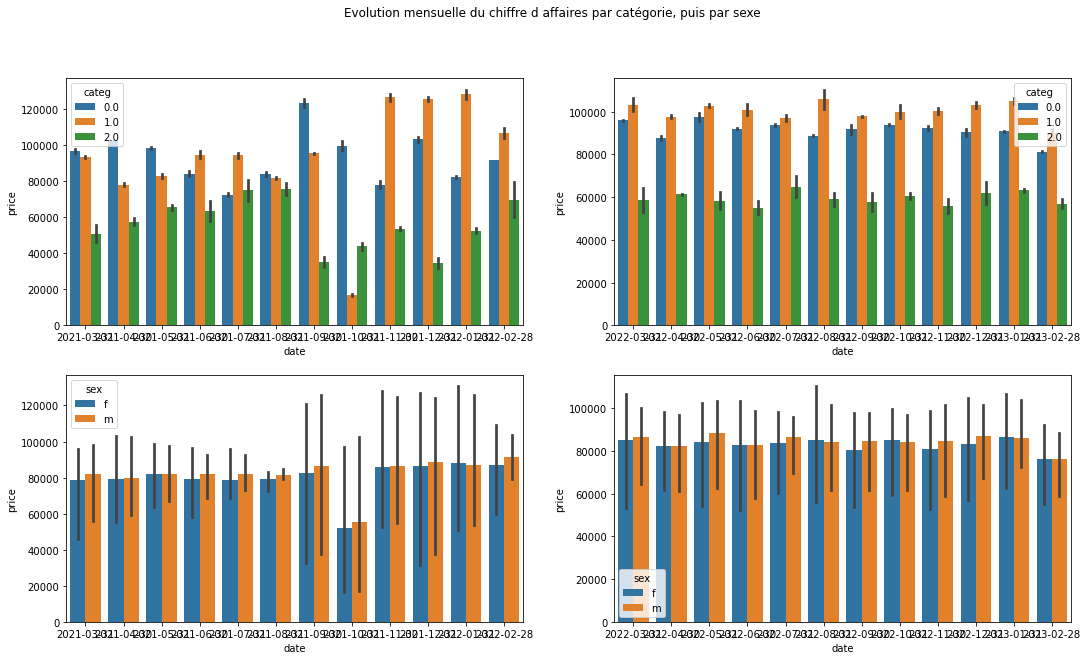

In [192]:
# Visualisation en 4 barplots distincts

fig, axes = plt.subplots(2, 2, figsize=(18, 10))
 
fig.suptitle('Evolution mensuelle du chiffre d affaires par catégorie, puis par sexe')
 
sns.barplot(ax=axes[0, 0], data=ventes_annee1mok, x = 'date', y = 'price', hue = 'categ')
sns.barplot(ax=axes[0, 1], data=ventes_annee2mok, x = 'date', y = 'price', hue = 'categ')
sns.barplot(ax=axes[1, 0], data=ventes_annee1mok, x = 'date', y = 'price', hue = 'sex')
sns.barplot(ax=axes[1, 1], data=ventes_annee2mok, x = 'date', y = 'price', hue = 'sex')

# Conclusion :

Notre analyse nous montre plusieurs évidences :
 - Le sexe n'influe pas sur la catégorie d'achats
 - Il y a une corrélation entre l'âge du client et la catégorie d'achats
 - La catégorie des actifs de 30 à 55 ans génère la majorité du chiffre d'affaires, le meilleur panier moyen et reviennent le plus souvent sur le site
 - Les 18-30 ans achètent le plus de produits de la catégorie 2 en nombre de ventes et en chiffre d'affaires
 

In [193]:
# Horaires d'achats
horaires = ventes_annee2.groupby(pd.Grouper(key='date', freq='h'))['session_id'].count()
gfg_csv_data = horaires.to_csv('tablehoraires.csv', index = True)

In [194]:
horaires

date
2022-03-01 00:00:00    37
2022-03-01 01:00:00    41
2022-03-01 02:00:00    38
2022-03-01 03:00:00    42
2022-03-01 04:00:00    43
                       ..
2023-02-28 19:00:00    35
2023-02-28 20:00:00    39
2023-02-28 21:00:00    43
2023-02-28 22:00:00    41
2023-02-28 23:00:00    44
Freq: H, Name: session_id, Length: 8760, dtype: int64

In [195]:
horaires = pd.read_csv ('tablehoraires.csv', sep=',')

In [196]:
times = pd.to_datetime(horaires.date)
visite_heure = horaires.groupby([times.dt.hour]).session_id.mean()

In [197]:
visite_heure.head()

date
0    38.402740
1    38.745205
2    39.410959
3    38.619178
4    38.572603
Name: session_id, dtype: float64

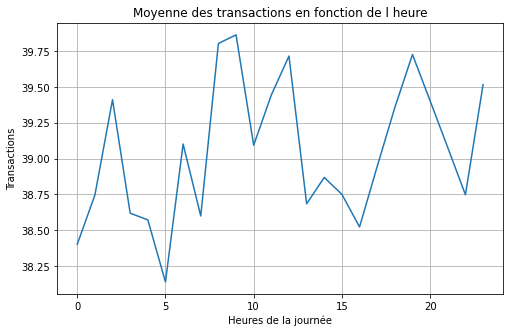

In [198]:
plt.figure(figsize = (8, 5))

plt.plot(visite_heure)
plt.title('Moyenne des transactions en fonction de l heure')
plt.xlabel('Heures de la journée')
plt.ylabel('Transactions')
plt.grid(True)
plt.show()